In [1]:
akshit = '\u0905\u0915\u094D\u0937\u093F\u0924'
kotnala = '\u0915\u094B\u091F\u0928\u093E\u0932\u093E'
print(akshit, kotnala)


अक्षित कोटनाला


In [2]:
#Step 1 is importing the Libraries for Data Manipulation and Visualization

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.utils import resample
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import  euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [4]:
#Step 2 Load the dataset and inspect it 
#(checking for null values, data types, etc.)

In [5]:
data = pd.read_csv("Mall_Customers.csv")

In [6]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# Data Wrangling
print("\nNull Values:\n", data.isnull().sum())


Null Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
#Data Preprocessing
#Selecting Relevant Features

In [10]:
x= data.iloc[:,2:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [11]:
#data preprocessing step, specifically focusing on 
#preparing the dataset by removing irrelevant columns.


In [12]:
#Data cleaning step 
data = data.drop('CustomerID', axis = 1)

In [13]:
#Data Preprocessing
#preparing the feature set for clustering
#feature selection phase.

In [14]:
## Selecting features - we'll cluster based on 'Annual Income' and 'Spending Score'
x = data.iloc[:, -3: ]
x


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [15]:
#data preprocessing, specifically data transformation. 
#By standardizing your features, you ensure that they are on the same scale, 
#x = data[['Annual Income (k$)', 'Spending Score (1-100)',]]
#which improves the performance and accuracy of clustering algorithms.

In [16]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

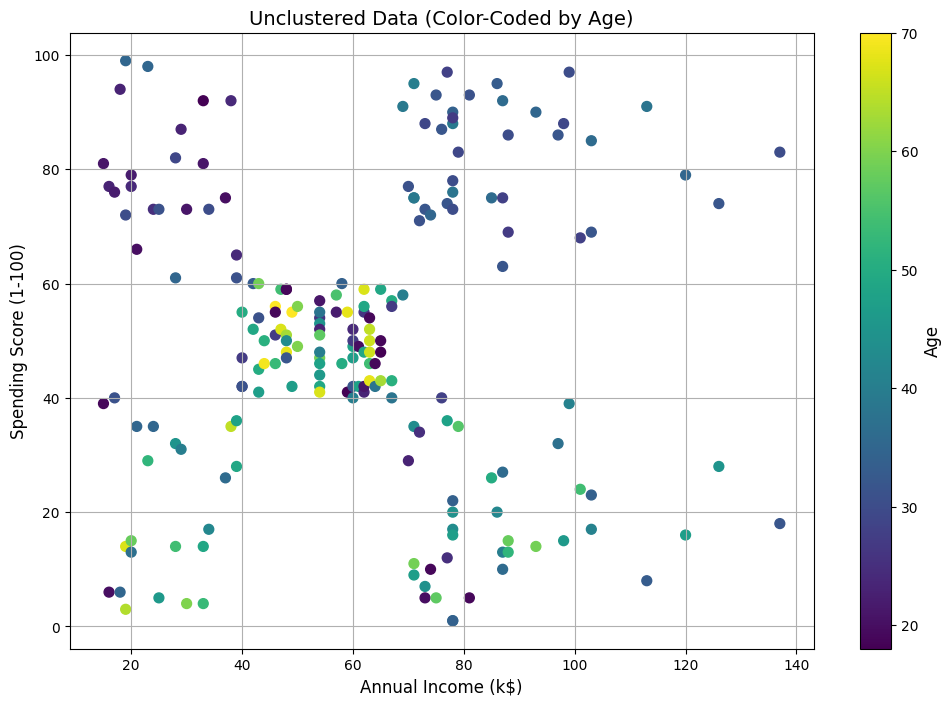

In [17]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Scatter plot with 'Annual Income' and 'Spending Score', color-coded by 'Age'
scatter = plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], 
                      c=x['Age'], s=50, cmap='viridis', alpha=1)  # Color points by 'Age'

# Set titles and labels
plt.title('Unclustered Data (Color-Coded by Age)', fontsize=14)  # Title for the scatter plot
plt.xlabel('Annual Income (k$)', fontsize=12)  # X-axis label for Annual Income
plt.ylabel('Spending Score (1-100)', fontsize=12)  # Y-axis label for Spending Score

plt.grid(True)  # Enable gridlines for better readability

# Add color bar to represent age
cbar = plt.colorbar(scatter)
cbar.set_label('Age', fontsize=12)
plt.show()  # Display the plot
y = data[['Annual Income (k$)', 'Spending Score (1-100)',]]


In [18]:
# Step 3: Applying K-Means Clustering
# Finding optimal K using the elbow method
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(y)

In [19]:
# Splitting the dataset into training and testing sets
x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

#This code belongs to both the data preparation phase (splitting the dataset)
#and the model evaluation phase (using Elbow and Silhouette methods to determine the optimal number of clusters).


# Automated Elbow and Silhouette method to choose the best k using training data
wcss = []  # List to store sum of squared errors (wcss) for each k
silhouette_scores = []  # List to store silhouette scores for each k
k_range = range(2, min(11, len(x_train)))  # Range of k values from 2 to 11 or number of samples

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    labels = kmeans.fit_predict(x_train)  # Fit model and predict cluster labels
    
    wcss.append(kmeans.inertia_)  # Append WCSS (inertia) to the list
    
    silhouette_avg = silhouette_score(x_train, labels)  # Calculate average silhouette score
    silhouette_scores.append(silhouette_avg)  # Store the silhouette score

# Find optimal k using Elbow and Silhouette methods
wcss_diff = np.diff(wcss)  # Calculate first derivative of WCSS
wcss_diff2 = np.diff(wcss_diff)  # Calculate second derivative of WCSS
elbow_k = np.argmin(wcss_diff2) + 1  # Find the k at the elbow point
best_k_silhouette = np.argmax(silhouette_scores) + 2  # Find the k with the highest silhouette score

# Final decision on optimal k
optimal_k = best_k_silhouette if best_k_silhouette < elbow_k else elbow_k  # Choose the best k

In [20]:
#Step 2: Model Evaluation (Visualizing Clustering Performance):
#This code snippet is part of the model evaluation phase, specifically focusing on visualizing how well the clusters are formed based on the WCSS.

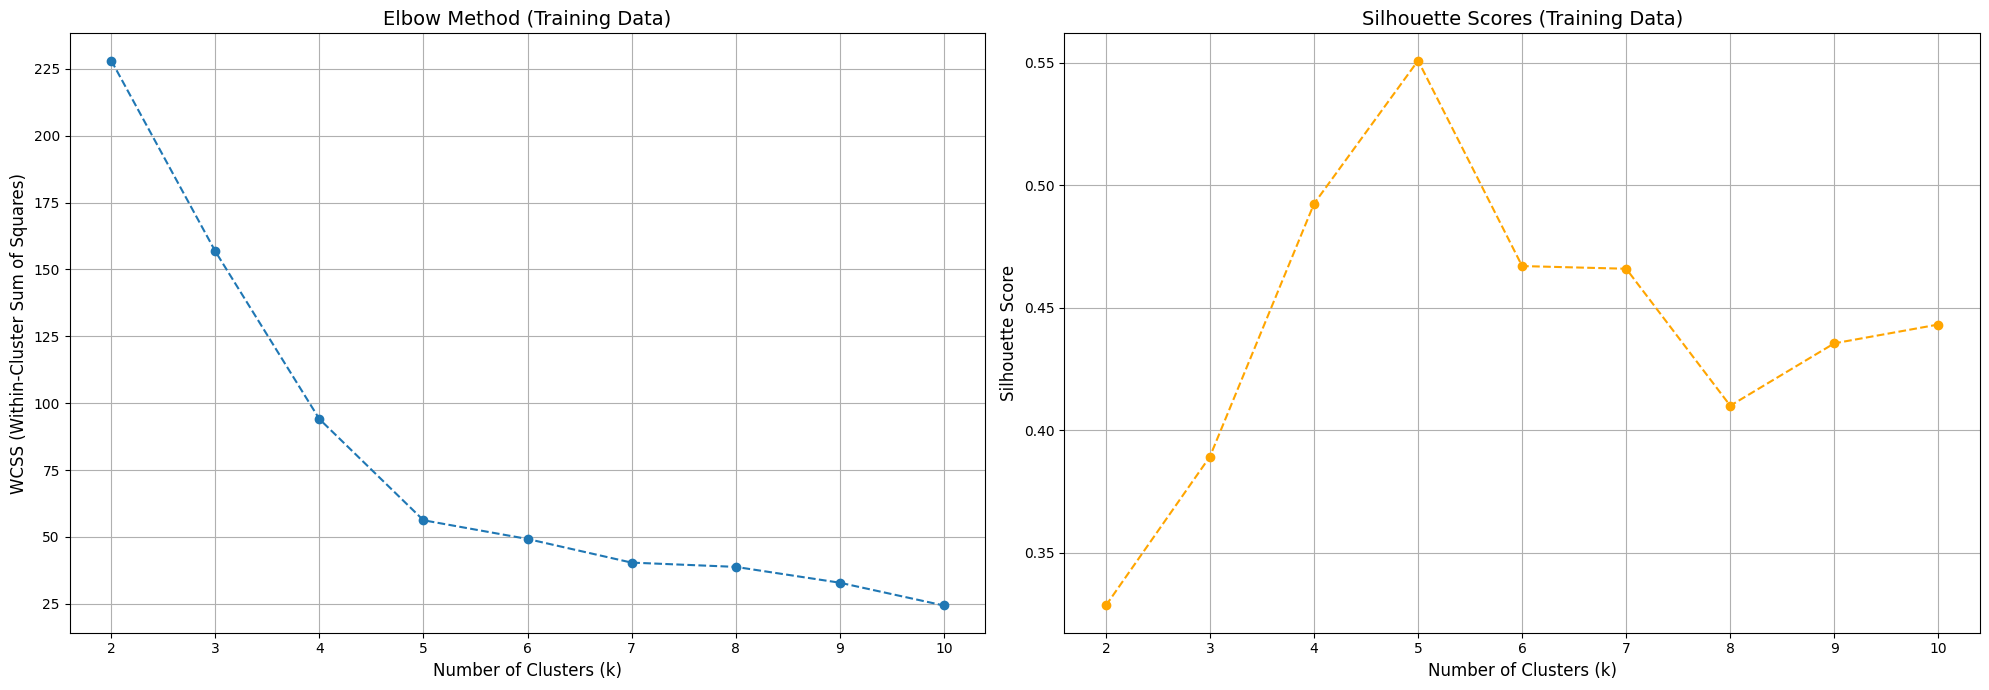

In [21]:
plt.figure(figsize=(20, 7))  # Set the figure size for both plots

# Plot WCSS for Elbow Method
plt.subplot(1, 2, 1)  # First subplot for WCSS (Elbow Method)
plt.plot(k_range, wcss, marker='o', linestyle='--')  # Plot WCSS against k
plt.title('Elbow Method (Training Data)', fontsize=14)  # Title for the Elbow plot
plt.xlabel('Number of Clusters (k)', fontsize=12)  # X-axis label
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)  # Y-axis label
plt.xticks(k_range)  # Set x-ticks to k values
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)  # Second subplot for Silhouette Scores
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o', color='orange', linestyle='--')  # Plot silhouette scores
plt.title('Silhouette Scores (Training Data)', fontsize=14)  # Title for the Silhouette plot
plt.xlabel('Number of Clusters (k)', fontsize=12)  # X-axis label
plt.ylabel('Silhouette Score', fontsize=12)  # Y-axis label
plt.xticks(range(2, len(silhouette_scores) + 2))  # Set x-ticks for silhouette scores
plt.grid(True)

# Adjust layout to make sure both plots are aligned and properly spaced
plt.tight_layout()

plt.show()  # Display both plots together


In [22]:
#Next Step:
#Choosing the Optimal Number of Clusters:
#Based on the plots of WCSS and silhouette scores, decide the optimal number of clusters (k) for your KMeans clustering. This involves comparing the elbow point from the first plot with the maximum silhouette score from the second plot.

In [23]:
# Output the optimal k values from both methods
print(f"Optimal number of clusters (Silhouette method): {best_k_silhouette}")
print(f"Optimal number of clusters (Elbow method): {elbow_k}")
print(f"Optimal Value of k: {optimal_k}")

Optimal number of clusters (Silhouette method): 5
Optimal number of clusters (Elbow method): 6
Optimal Value of k: 5


In [24]:
#Data Visualization:
#This code is part of the data visualization step, where you visually inspect the unclustered data to understand its distribution and identify patterns before clustering.

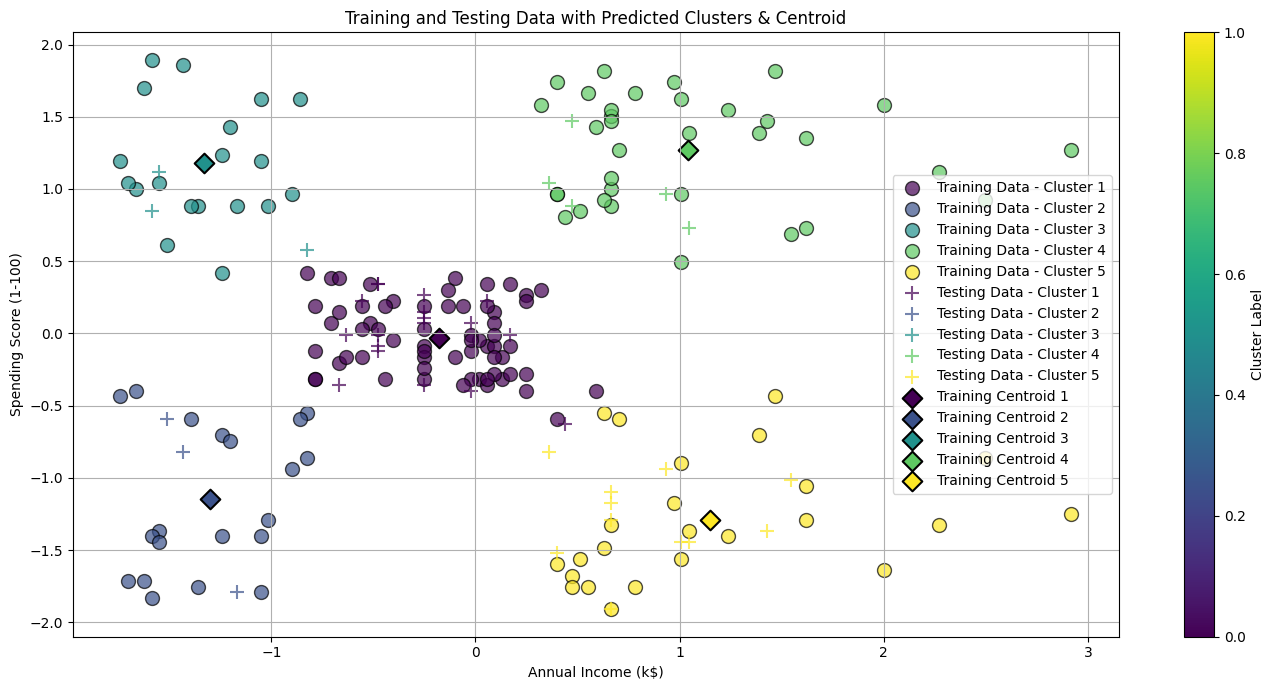

In [25]:
# Step 3: Split the dataset into training and testing sets
x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 4: Fit KMeans model to the training data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Initialize KMeans
kmeans.fit(x_train)  # Fit on training data

# Step 5: Predict labels for both training and testing data
train_labels = kmeans.predict(x_train)  # Predict labels for training data
test_labels = kmeans.predict(x_test)  # Predict labels for testing data

# Get centroids
centroids = kmeans.cluster_centers_

# Step 6: Visualization of training and testing data with predicted cluster labels
plt.figure(figsize=(14, 7))  # Set figure size

# Scatter plot for both training and testing data
plt.title('Training and Testing Data with Predicted Clusters & Centroid')  # Title for the combined plot
plt.xlabel('Annual Income (k$)')  # X-axis label
plt.ylabel('Spending Score (1-100)')  # Y-axis label

# Create a color map for training and testing data
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

# Scatter plot for training data
for i in range(optimal_k):
    plt.scatter(x_train[train_labels == i, 0], 
                x_train[train_labels == i, 1], 
                color=colors[i], 
                s=100, 
                alpha=0.7, 
                edgecolor='k', 
                label=f'Training Data - Cluster {i + 1}')

# Scatter plot for testing data
for i in range(optimal_k):
    plt.scatter(x_test[test_labels == i, 0], 
                x_test[test_labels == i, 1], 
                color=colors[i], 
                s=100, 
                alpha=0.7, 
                edgecolor='k', 
                marker='+', 
                label=f'Testing Data - Cluster {i + 1}')

# Plot centroids for training data only
for i in range(optimal_k):
    plt.scatter(centroids[i, 0], centroids[i, 1], s=100, marker='D', 
                color=colors[i], 
                edgecolor='k', 
                linewidth=1.5, 
                label=f'Training Centroid {i + 1}')  # Remove the condition

# Create a color bar to indicate cluster labels
plt.colorbar(label='Cluster Label')  # Color bar for training data
plt.legend()  # Show legend for the plots

plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

In [26]:
# Function to calculate and print within-cluster and between-cluster distances
def calculate_cluster_distances(data, centroids, labels):
    # Convert data to DataFrame for easier manipulation
    df = pd.DataFrame(data)
    
    # Calculate total within-cluster distance (scatter matrix)
    total_within_cluster_distance = 0
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        # Use np.where to get the indices of points in the current cluster
        cluster_indices = np.where(labels == label)[0]
        cluster_data = df.iloc[cluster_indices]  # Get data points for the cluster
        
        if len(cluster_data) > 1:  # Only calculate if more than one point
            scatter_matrix = np.cov(cluster_data, rowvar=False)  # Scatter matrix for the cluster
            # Calculate within-cluster distance as the trace of the scatter matrix
            total_within_cluster_distance += np.trace(scatter_matrix)
    
    # Calculate distances between centroids
    centroid_df = pd.DataFrame(centroids)  # Convert centroids to DataFrame
    centroid_distances = np.linalg.norm(centroid_df.values[:, np.newaxis] - centroid_df.values[np.newaxis, :], axis=2)
    np.fill_diagonal(centroid_distances, np.inf)  # Ignore self-distances
    
    # Minimum between-cluster distance (shortest distance between any two centroids)
    min_between_cluster_distance = np.min(centroid_distances)
    
    # Print essential evaluation metrics
    print(f"Total Within-Cluster Distance: {total_within_cluster_distance:.2f}")
    print(f"Minimum Between-Cluster Distance: {min_between_cluster_distance:.2f}")
    
    # Print distances between centroids
    print("\nDistances Between Centroids:")
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            print(f"Centroid {i + 1} to Centroid {j + 1}: {centroid_distances[i, j]:.2f}")
    
    return total_within_cluster_distance, min_between_cluster_distance

# Example call of the function (ensure x_scaled, centroids, and labels are defined)
total_within_cluster_distance, min_between_cluster_distance = calculate_cluster_distances(X_scaled, centroids, labels)

Total Within-Cluster Distance: 13.38
Minimum Between-Cluster Distance: 1.58

Distances Between Centroids:
Centroid 1 to Centroid 2: 1.58
Centroid 1 to Centroid 3: 1.67
Centroid 1 to Centroid 4: 1.79
Centroid 1 to Centroid 5: 1.83
Centroid 2 to Centroid 3: 2.32
Centroid 2 to Centroid 4: 3.37
Centroid 2 to Centroid 5: 2.45
Centroid 3 to Centroid 4: 2.37
Centroid 3 to Centroid 5: 3.50
Centroid 4 to Centroid 5: 2.56


In [27]:
# K-fold validation to evaluate the stability of clustering
def perform_kfold_validation(data, n_splits=5, k=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Initialize KFold
    fold_scores = []  # List to store silhouette scores for each fold
    
    print("Starting K-Fold Validation...")
    fold_count = 1
    for train_index, test_index in kf.split(data):
        train_data, test_data = data[train_index], data[test_index]  # Split data into training and testing
        kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
        kmeans.fit(train_data)# Fit KMeans on training data
        
        test_labels = kmeans.predict(test_data)  # Predict labels for test data
        score = silhouette_score(test_data, test_labels)  # Calculate silhouette score
        fold_scores.append(score)  # Store score
        
        print(f"Fold {fold_count}: Silhouette Score = {score:.3f}")  # Print score for current fold
        fold_count += 1
    
    print("Completed K-Fold Validation.")
    average_score = sum(fold_scores) / len(fold_scores)  # Calculate average score
    print(f"Average Silhouette Score: {average_score:.3f}")



    return fold_scores  # Return scores for further analysis

# Call the function with the standardized data and optimal k
k_fold_scores = perform_kfold_validation(x_train, n_splits=5, k=optimal_k)

Starting K-Fold Validation...
Fold 1: Silhouette Score = 0.553
Fold 2: Silhouette Score = 0.549
Fold 3: Silhouette Score = 0.551
Fold 4: Silhouette Score = 0.536
Fold 5: Silhouette Score = 0.516
Completed K-Fold Validation.
Average Silhouette Score: 0.541


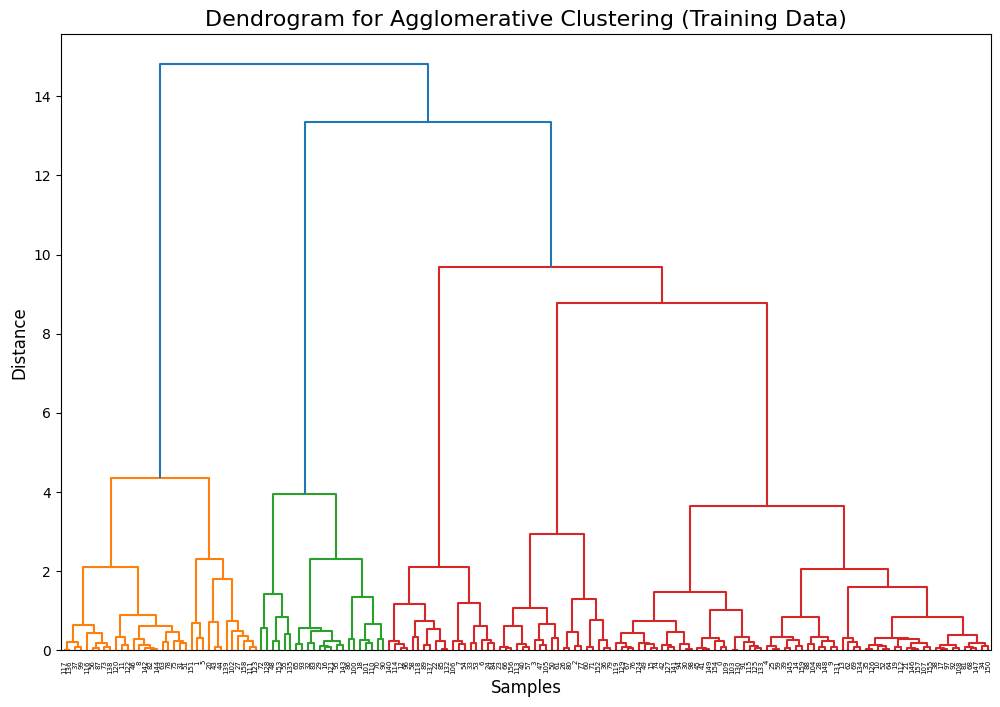

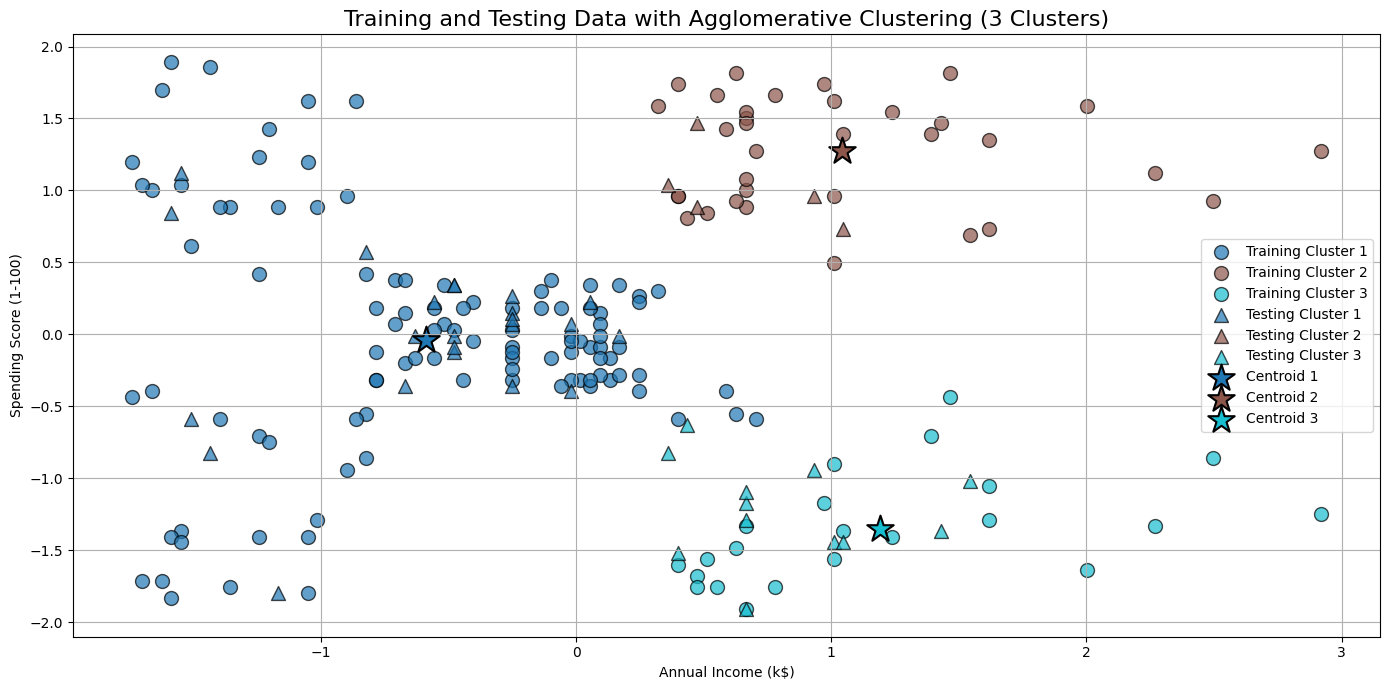

In [28]:
x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


# Step 3: Fit Agglomerative Clustering model to the training data using 3 clusters
best_k = 3
agl = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
train_labels = agl.fit_predict(x_train)

# Step 4: Plot the dendrogram for the training data
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(x_train, method='ward')
dendrogram(linkage_matrix)
plt.axhline(y=150, color='r', linestyle='--')  # Optional: Cut-off line to show 3 clusters
plt.title('Dendrogram for Agglomerative Clustering (Training Data)', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

# Step 5: Predict clusters for the testing data using the nearest centroid approximation
def nearest_centroid_predict(centroids, data):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Calculate centroids for each cluster in training data
centroids = np.array([x_train[train_labels == i].mean(axis=0) for i in range(best_k)])

# Predict the cluster labels for testing data based on nearest centroid
test_labels = nearest_centroid_predict(centroids, x_test)

# Step 6: Visualization of training and testing data with predicted cluster labels and centroids
plt.figure(figsize=(14, 7))
colors = plt.cm.get_cmap('tab10', best_k)  # Use a colormap to assign consistent colors

# Plot training data points with different colors for each cluster
for i in range(best_k):
    plt.scatter(x_train[train_labels == i, 0], x_train[train_labels == i, 1], 
                label=f'Training Cluster {i+1}', s=100, alpha=0.7, edgecolor='k', color=colors(i))

# Plot testing data points with different colors and marker '^' for each cluster
for i in range(best_k):
    plt.scatter(x_test[test_labels == i, 0], x_test[test_labels == i, 1], 
                label=f'Testing Cluster {i+1}', marker='^', s=100, alpha=0.7, edgecolor='k', color=colors(i))

# Plot centroids with '*' marker
for i in range(best_k):
    plt.scatter(centroids[i, 0], centroids[i, 1], s=400, marker='*', 
                color=colors(i), edgecolor='k', linewidth=1.5, label=f'Centroid {i+1}')

# Customize the plot
plt.title('Training and Testing Data with Agglomerative Clustering (3 Clusters)', fontsize=16)
plt.xlabel('Annual Income (k$)')  # X-axis label
plt.ylabel('Spending Score (1-100)')  # Y-axis label

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()